In [5]:
import pickle
import os
import pandas as pd
from matplotlib import pyplot as plt
os.chdir(os.path.expanduser('~/wcEcoli/out/data _from_MBP/sherlock_data/135731__gfp_shift_minimal_media_DL_05092024/gfp_shift_minimal_media_avg_PC_data_csvs_DL_05092024/filtered csvs/'))
# noinspection PyUnresolvedReferences
import numpy as np
import polars as pl
import plotly.graph_objects as go
from models.ecoli.analysis import variantAnalysisPlot
from wholecell.analysis.analysis_tools import (exportFigure,
	read_bulk_molecule_counts, read_stacked_bulk_molecules, read_stacked_columns)
from wholecell.io.tablereader import TableReader

In [26]:
name_front = 'wcm_filter_1_monomers_var_'
name_back = '_startGen_14.csv'

v1 = pd.read_csv(name_front + '1' + name_back)
v2 = pd.read_csv(name_front + '2' + name_back)
v3 = pd.read_csv(name_front + '3' + name_back)
v4 = pd.read_csv(name_front + '4' + name_back)
v5 = pd.read_csv(name_front + '5' + name_back)
v6 = pd.read_csv(name_front + '6' + name_back)
v7 = pd.read_csv(name_front + '7' + name_back)
v8 = pd.read_csv(name_front + '8' + name_back)
v9 = pd.read_csv(name_front + '9' + name_back)
v10 = pd.read_csv(name_front + '10' + name_back)
v11 = pd.read_csv(name_front + '11' + name_back)
v12 = pd.read_csv(name_front + '12' + name_back)
v13 = pd.read_csv(name_front + '13' + name_back)
v14 = pd.read_csv(name_front + '14' + name_back)
v15 = pd.read_csv(name_front + '15' + name_back)
v16 = pd.read_csv(name_front + '16' + name_back)
v17 = pd.read_csv(name_front + '17' + name_back)
v18 = pd.read_csv(name_front + '18' + name_back)
v19 = pd.read_csv(name_front + '19' + name_back)
v20 = pd.read_csv(name_front + '20' + name_back)


In [35]:
# define the legends: 
str1 = "Var 1 (NGE: 7, TE: 5)"
str2 = "Var 2 (NGE: 7, TE: 1)"
str3 = "Var 3 (NGE: 7, TE: 0.1)"
str4 = "Var 4 (NGE: 7, TE: 0)"
str5 = "Var 5 (NGE: 7, TE: 10)"
str6 = "Var 6 (NGE: 8, TE: 5)"
str7 = "Var 7 (NGE: 8, TE: 1)"
str8 = "Var 8 (NGE: 8, TE: 0.1)"
str9 = "Var 9 (NGE: 8, TE: 0)"
str10 = "Var 10 (NGE: 8, TE: 10)"
str11 = "Var 11 (NGE: 9, TE: 5)"
str12 = "Var 12 (NGE: 9, TE: 1)"
str13 = "Var 13 (NGE: 9, TE: 0.1)"
str14 = "Var 14 (NGE: 9, TE: 0)"
str15 = "Var 15 (NGE: 9, TE: 10)"
str16 = "Var 16 (NGE: 10, TE: 5)"
str17 = "Var 17 (NGE: 10, TE: 1)"
str18 = "Var 18 (NGE: 10, TE: 0.1)"
str19 = "Var 19 (NGE: 10, TE: 0)"
str20 = "Var 20 (NGE: 10, TE: 10)"


In [40]:
# 1: Anaylze only the normalized data:  
def normalize_data(df):
    pl_df = pl.DataFrame(df)
    name = pl_df.columns[2]
    pl_df = pl_df.rename({"var_0_avg_PCs": "Control_Variant", name: "Experimental_Variant"})
    
    df_sum = pl_df.sum()
    
    df_C = pl_df.with_columns((pl.col("Control_Variant") / v1_sum["Control_Variant"]).alias("Control_Variant_normalized"))
    df_CE = df_C.with_columns((pl.col("Experimental_Variant") / v1_sum["Experimental_Variant"]).alias("Experimental_Variant_normalized"))
    
    df_normalized = df_CE.select(["filtered_monomer_ids","Control_Variant_normalized", "Experimental_Variant_normalized"])
    df_normalized = df_normalized.to_pandas()
    return df_normalized

# normalize the data: 
v1n = normalize_data(v1)
v2n = normalize_data(v2)
v3n = normalize_data(v3)
v4n = normalize_data(v4)
v5n = normalize_data(v5)
v6n = normalize_data(v6)
v7n = normalize_data(v7)
v8n = normalize_data(v8)
v9n = normalize_data(v9)
v10n = normalize_data(v10)
v11n = normalize_data(v11)
v12n = normalize_data(v12)
v13n = normalize_data(v13)
v14n = normalize_data(v14)
v15n = normalize_data(v15)
v16n = normalize_data(v16)
v17n = normalize_data(v17)
v18n = normalize_data(v18)
v19n = normalize_data(v19)
v20n = normalize_data(v20)




only normalized data: 

[0.         0.00050505 0.0010101  0.00151515 0.0020202  0.00252525
 0.0030303  0.00353535 0.0040404  0.00454545 0.00505051 0.00555556
 0.00606061 0.00656566 0.00707071 0.00757576 0.00808081 0.00858586
 0.00909091 0.00959596 0.01010101 0.01060606 0.01111111 0.01161616
 0.01212121 0.01262626 0.01313131 0.01363636 0.01414141 0.01464646
 0.01515152 0.01565657 0.01616162 0.01666667 0.01717172 0.01767677
 0.01818182 0.01868687 0.01919192 0.01969697 0.02020202 0.02070707
 0.02121212 0.02171717 0.02222222 0.02272727 0.02323232 0.02373737
 0.02424242 0.02474747 0.02525253 0.02575758 0.02626263 0.02676768
 0.02727273 0.02777778 0.02828283 0.02878788 0.02929293 0.02979798
 0.03030303 0.03080808 0.03131313 0.03181818 0.03232323 0.03282828
 0.03333333 0.03383838 0.03434343 0.03484848 0.03535354 0.03585859
 0.03636364 0.03686869 0.03737374 0.03787879 0.03838384 0.03888889
 0.03939394 0.03989899 0.04040404 0.04090909 0.04141414 0.04191919
 0.04242424 0.04292929 0.04343434 0.04393939 0.04444444 0.0449

Text(0.5, 1.0, 'Normalized protein counts for variants with a new gene expression index set to 7 \n plotted against the control variant')

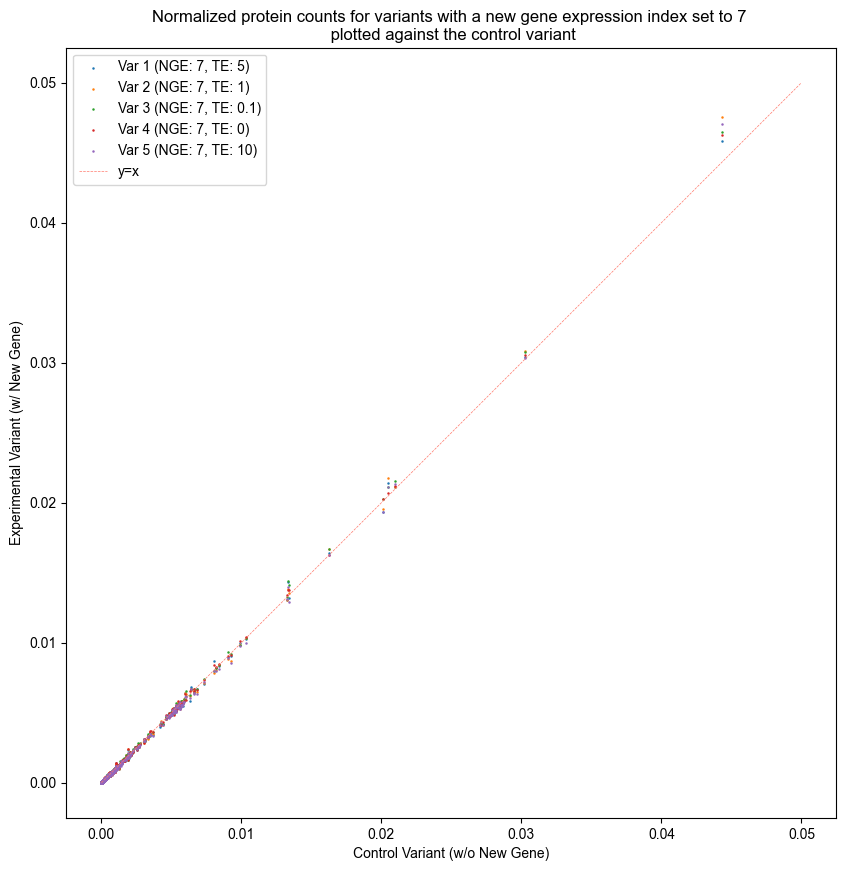

In [54]:
# plot all normalized data. Plot x = control, y = experimental:
plt.figure(figsize=(10, 10))

# plot the data:
plt.scatter(v1n.Control_Variant_normalized, v1n.Experimental_Variant_normalized, .6); 
plt.scatter(v2n.Control_Variant_normalized, v2n.Experimental_Variant_normalized, .6); 
plt.scatter(v3n.Control_Variant_normalized, v3n.Experimental_Variant_normalized, .6); 
plt.scatter(v4n.Control_Variant_normalized, v4n.Experimental_Variant_normalized, .6); 
plt.scatter(v5n.Control_Variant_normalized, v5n.Experimental_Variant_normalized, .6); 

# find the maximum value:
max_vals = [max(v1n.Control_Variant_normalized), max(v1n.Experimental_Variant_normalized), max(v2n.Control_Variant_normalized), max(v2n.Experimental_Variant_normalized), max(v3n.Control_Variant_normalized), max(v3n.Experimental_Variant_normalized), max(v4n.Control_Variant_normalized), max(v4n.Experimental_Variant_normalized), max(v5n.Control_Variant_normalized), max(v5n.Experimental_Variant_normalized)]; max_val = round(max(max_vals)) + .05;    

# plot a y=x string

yxvals= np.linspace(0, .05, 100)
plt.plot(yxvals, yxvals, linewidth=.5, linestyle="dashed", color="#FF796C"); yxstr = "y=x"


legend = [str1, str2, str3, str4, str5, yxstr]
plt.legend(legend)
plt.axis('square')
plt.xlabel("Control Variant (w/o New Gene)")
plt.ylabel(f"Experimental Variant (w/ New Gene)")
plt.title(f"Normalized protein counts for variants with a new gene expression index set to 7 \n plotted against the control variant")


In [33]:
# 2: Anaylze only the log data:
def log10_data(df):
    pl_df = pl.DataFrame(df)
    name = pl_df.columns[2]
    pl_df = pl_df.rename({"var_0_avg_PCs": "Control_Variant", name: "Experimental_Variant"})
    
    pl_df = pl_df.with_columns(pl.col("Control_Variant").log10().alias("log10_Control_Variant"))
    pl_df = pl_df.with_columns(pl.col("Experimental_Variant").log10().alias("log10_Experimental_Variant"))

    df_log10 = pl_df.select(["filtered_monomer_ids","log10_Control_Variant", "log10_Experimental_Variant"])
    
    return df_log10



In [32]:
# 3: Anaylze the log10 of the normalized data: 
def log10_normalized_data(df):
    pl_df = pl.DataFrame(df)
    name = pl_df.columns[2]
    pl_df = pl_df.rename({"var_0_avg_PCs": "Control_Variant", name: "Experimental_Variant"})
    
    df_sum = pl_df.sum()
    
    df_C = pl_df.with_columns((pl.col("Control_Variant") / v1_sum["Control_Variant"]).alias("Control_Variant_normalized"))
    df_CE = df_C.with_columns((pl.col("Experimental_Variant") / v1_sum["Experimental_Variant"]).alias("Experimental_Variant_normalized"))
    
    df_normalized = df_CE.select(["filtered_monomer_ids","Control_Variant_normalized", "Experimental_Variant_normalized"])
    
    df_log10 = df_normalized.with_columns(pl.col("Control_Variant_normalized").log10().alias("log10_normalized_Control_Variant"))
    df_log10 = df_log10.with_columns(pl.col("Experimental_Variant_normalized").log10().alias("log10_normalized_Experimental_Variant"))
    
    df_normalized_log10 = df_log10.select(["filtered_monomer_ids","log10_normalized_Control_Variant", "log10_normalized_Experimental_Variant"])
    return df_normalized_log10